# Dataset Downloaded from Kaggle : https://www.kaggle.com/jessemostipak/hotel-booking-demand

3 Questions that may help the hotel to improve their business by reducing cancellation rate:
1. What is the cancellation rate over the years for different hotel categories?
2. Are we able to predict booking cancellation?  
3. For those booking at risk for cancellation, what can the hotel do to mitigate the risk?

In [1]:
# import the needed library to load the hotel booking data downloaded from Kaggle.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./Dataset/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Basic Data Analysis

First, let's look at the data set to see any missing value or any further data process required.

In [2]:
# looks at the data summary - seems like OK
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [3]:
# now looks at which columns with missing values
dfMissingValue = pd.DataFrame(df.isnull().mean(), columns=['MissingMean'])
dfMissingValue[dfMissingValue.MissingMean >0]

,MissingMean
children,0.000034
country,0.004087
agent,0.136862
company,0.943069


In [4]:
# There are about 112593 records, ~95% of total data set missing Company value.
dfNullAgComp = df[(df.company.isnull())]
dfNullAgComp.shape

(112593, 32)

In [5]:
# There are about 16340 records, ~14% of total data set missing Agent value.
dfNullAgAgent = df[(df.agent.isnull())]
dfNullAgAgent.shape

(16340, 32)

In [6]:
# There are about 9760 records, ~8% of total data set missing Company & Agent value.
dfNullAgComp = df[(df.company.isnull()) & (df.agent.isnull())]
dfNullAgComp.shape

(9760, 32)

In [7]:
#Evaluate what are the unique values for both Company and Agent
df.company.sort_values(ascending=True).unique()

array([  6.,   8.,   9.,  10.,  11.,  12.,  14.,  16.,  18.,  20.,  22.,
        28.,  29.,  31.,  32.,  34.,  35.,  37.,  38.,  39.,  40.,  42.,
        43.,  45.,  46.,  47.,  48.,  49.,  51.,  52.,  53.,  54.,  59.,
        61.,  62.,  64.,  65.,  67.,  68.,  71.,  72.,  73.,  76.,  77.,
        78.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  88.,  91.,  92.,
        93.,  94.,  96.,  99., 100., 101., 102., 103., 104., 105., 106.,
       107., 108., 109., 110., 112., 113., 115., 116., 118., 120., 122.,
       126., 127., 130., 132., 135., 137., 139., 140., 142., 143., 144.,
       146., 148., 149., 150., 153., 154., 158., 159., 160., 163., 165.,
       167., 168., 169., 174., 178., 179., 180., 183., 184., 185., 186.,
       192., 193., 195., 197., 200., 202., 203., 204., 207., 209., 210.,
       212., 213., 215., 216., 217., 218., 219., 220., 221., 222., 223.,
       224., 225., 227., 229., 230., 232., 233., 234., 237., 238., 240.,
       242., 243., 245., 246., 250., 251., 253., 25

In [8]:
df.agent.sort_values(ascending=True).unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  44.,  45.,  47.,
        50.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        63.,  64.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
        75.,  77.,  78.,  79.,  81.,  82.,  83.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  98.,  99., 103.,
       104., 105., 106., 107., 110., 111., 112., 114., 115., 117., 118.,
       119., 121., 122., 126., 127., 128., 129., 132., 133., 134., 135.,
       138., 139., 141., 142., 143., 144., 146., 147., 148., 149., 150.,
       151., 152., 153., 154., 155., 156., 157., 158., 159., 162., 163.,
       165., 167., 168., 170., 171., 173., 174., 175., 177., 179., 180.,
       181., 182., 183., 184., 185., 187., 191., 19

In [9]:
# Next let's review column of Child
dfNullChildren = df[(df.children.isnull())]
dfNullChildren.shape

dfNullChildren

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [10]:
# Next let's review column of Country
dfNullCountry = df[(df.country.isnull())]
dfNullCountry.shape

# check what are the unique values for country
df.country.sort_values(ascending=True).unique()

# analyze is there any pattern of data combinations when country is NaN.  Nothing obvious observed based on the data summary
dfNullCountry.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,154.000000,174.000000,488.0,488.000000,488.000000,488.000000
mean,0.137295,31.741803,2015.897541,26.786885,15.231557,0.612705,2.053279,1.368852,0.026639,0.008197,0.008197,0.081967,1.469262,0.209016,186.454545,175.637931,0.0,60.486824,0.217213,0.487705
std,0.344512,64.022254,0.658037,16.951303,8.882860,1.438543,3.316506,0.539234,0.184923,0.110693,0.090256,0.296181,3.126209,0.525881,106.703614,111.817931,0.0,45.194175,0.412772,0.818079
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.750000,2015.000000,10.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,94.000000,0.0,35.000000,0.000000,0.000000
50%,0.000000,4.000000,2016.000000,28.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,154.000000,0.0,46.500000,0.000000,0.000000
75%,0.000000,16.250000,2016.000000,43.000000,23.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,240.000000,269.000000,0.0,65.000000,0.000000,1.000000
max,1.000000,267.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,3.000000,2.000000,2.000000,1.000000,2.000000,29.000000,4.000000,468.000000,490.000000,0.0,305.000000,1.000000,5.000000


In [11]:
# With the above, it is safe to replace NaN value with: 
#   i.   0 for Company and Agent columns to represent the respective booking was not file neither by Company or Agent
#   ii.  0 for Children
#   iii. OTH for Country

dfProcess = df
dfProcess.company.fillna(value=0, inplace=True)
dfProcess.agent.fillna(value=0, inplace=True)
dfProcess.children.fillna(value=0, inplace=True)
dfProcess.country.fillna(value='OTH', inplace=True)

dfMissingValue = pd.DataFrame(dfProcess.isnull().mean(), columns=['MissingMean'])
dfMissingValue[dfMissingValue.MissingMean >0]

,MissingMean


# Now let's start to answer the 3 business questions posted earlier:

# Question 1. What is the cancellation rate over the years for different hotel categories?

In [12]:
# First, let's analyze the cancellation rate over the years for different hotel types.
HotelCancellationTransactions = pd.DataFrame(df.groupby(['reservation_status','arrival_date_year','hotel']).count()['arrival_date_week_number'].unstack())
HotelCancellationTransactions

hotel                                 City Hotel  Resort Hotel
reservation_status arrival_date_year                          
Canceled           2015                     5882          2069
                   2016                    14852          4817
                   2017                    11452          3945
Check-Out          2015                     7678          6176
                   2016                    22733         13637
                   2017                    15817          9125
No-Show            2015                      122            69
                   2016                      555           113
                   2017                      239           109

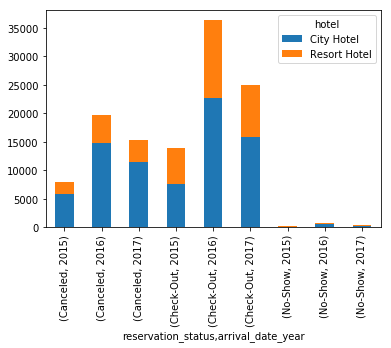

In [13]:
HotelCancellationTransactions.plot(kind='bar', stacked=True)

In [14]:
dfHotelRSBreakdown = pd.DataFrame(columns = ['Hotel', 'Year', 'PcCanceled', 'PcCheckOut', 'PcNoShow'])
for hotelType in df['hotel'].unique():
    for rsYear in df.loc[df['hotel']==hotelType]['arrival_date_year'].unique():
        dfSubset = df.loc[(df['hotel']==hotelType) & (df['arrival_date_year']==rsYear)]       
        TotalTrans = dfSubset.shape[0]
        PcCanceled = dfSubset.loc[dfSubset['reservation_status']=='Canceled'].shape[0]
        PcCheckOut = dfSubset.loc[dfSubset['reservation_status']=='Check-Out'].shape[0]
        PcNoShow = dfSubset.loc[dfSubset['reservation_status']=='No-Show'].shape[0]
        newRow = pd.Series([hotelType, rsYear, round(PcCanceled/TotalTrans, 2), round(PcCheckOut/TotalTrans,2), round(PcNoShow/TotalTrans,2)], index=dfHotelRSBreakdown.columns)
        dfHotelRSBreakdown = dfHotelRSBreakdown.append(newRow, ignore_index=True)

dfHotelRSBreakdown

,Hotel,Year,PcCanceled,PcCheckOut,PcNoShow
0,Resort Hotel,2015,0.25,0.74,0.01
1,Resort Hotel,2016,0.26,0.73,0.01
2,Resort Hotel,2017,0.30,0.69,0.01
3,City Hotel,2015,0.43,0.56,0.01
4,City Hotel,2016,0.39,0.60,0.01
5,City Hotel,2017,0.42,0.57,0.01


# Analysis - Cancellation rate over the years for different hotel categories:
1. Observed that City Hotel had a higher # of transactions in total compared to Resolt Hotel cross 2015-2017.  
2. At the same time, City Hotel had higher # of cancellations as well as cancellation rate compared to Resort Hotel cross the 3 years period.  
3. Cancellation rate for City Hotel reduced slightly 2016 compared to 2015 but increased in 2017.  On the other hand, Cancellation rate for Resort Hotel increased over years.  
4. To answer the subsequent questions, we will focus only for City Hotel using Year 2017 data set.

# Question 2. Are we able to predict booking cancellation? (Targetted: City Hotel) 

In [15]:
# Let's analyze cancellation data for City Hotel in Year 2017
dfCity2017 = dfProcess[(dfProcess.hotel =='City Hotel') & (dfProcess.arrival_date_year ==2017)]
dfCity2017.shape

(27508, 32)

In [16]:
dfCity2017[dfCity2017.reservation_status == 'No-Show'].deposit_type.unique()

array(['No Deposit', 'Non Refund'], dtype=object)

# 2.1 Analysis by Country

In [17]:
# Define function to plot pie chart
def PiePlot(dfValues, dfLabels) :
    # pie plot
    plt.pie(dfValues, labels=dfLabels, autopct='%1.1f%%', shadow=True)
    plt.show()

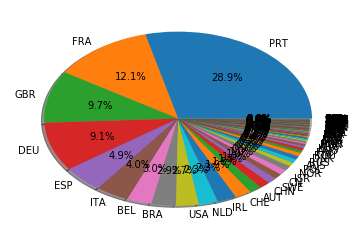

In [18]:
# Country distribution for all transactions 
dfCountry = pd.DataFrame(dfCity2017.groupby(['country']).count()['hotel'])
dfCountry.rename(columns={'hotel':'Number of Bookings'}, inplace=True)
dfCountry.sort_values(by='Number of Bookings', ascending=False, inplace=True)
#dfCountry.head()
dfCountry["Booking Rate %"] = round(dfCountry["Number of Bookings"]/dfCity2017.shape[0],3)
dfCountry["Country"] = dfCountry.index
#dfCountry["Booking Rate %"].sum()

# pie plot
PiePlot(dfCountry["Number of Bookings"], dfCountry["Country"])

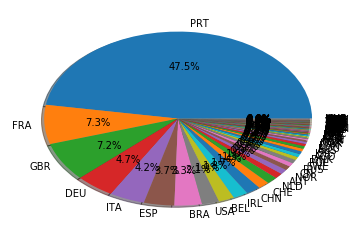

In [19]:
# Next lets see the cancellation by country

dfCancelCountry = pd.DataFrame(dfCity2017[dfCity2017.is_canceled ==1].groupby(['country']).count()['hotel'])
dfCancelCountry.rename(columns={'hotel':'Number of Cancel Bookings'}, inplace=True)
dfCancelCountry.sort_values(by='Number of Cancel Bookings', ascending=False, inplace=True)
dfCancelCountry["Booking Cancel Rate %"] = round(dfCancelCountry["Number of Cancel Bookings"]/dfCity2017.shape[0],3)
dfCancelCountry["Country Cancel"] = dfCancelCountry.index
dfCancelCountry["Booking Cancel Rate %"].sum()

# pie plot
PiePlot(dfCancelCountry["Number of Cancel Bookings"], dfCancelCountry["Country Cancel"])


# Analysis by Country Summary:
1. The hotels seems to be located in Europe as top countries with high # of total and cancellation transactions are from Europe Region.  With further analysis over internet, it is confirmed that the hotels are located in Portugal.
2. Local guests from Portugal has the highest cancellation rate among others, ~48% over total transactions.
3. We might want to consider festive seasons & holidays in Europe in general as well as Portugal in specific for subsequent data analysis.


# 2.2 Analysis by Month

In [20]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

# 2.2.1 Let's first look at City Hotel monthly cancellation trend for 2015-2017

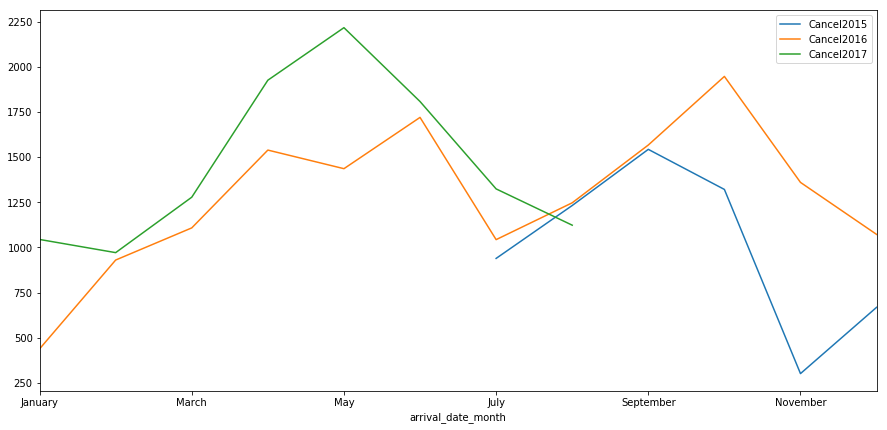

In [21]:
dfCompare = pd.DataFrame()
for yr in [2016,2015,2017]:
    dfHotel = dfProcess[(dfProcess.hotel =='City Hotel') & (dfProcess.arrival_date_year == yr)]

    # Monthly distribution for Cancelled transactions 
    dfCancelTrnx = pd.DataFrame(dfHotel[dfHotel.is_canceled ==1].groupby(['arrival_date_month']).count()['hotel'])
    colCancelYear = 'Cancel{}'.format(yr)
    dfCancelTrnx.rename(columns={'hotel':colCancelYear}, inplace=True)
    dfCancelTrnx["Month"] = pd.Categorical(dfCancelTrnx.index, categories=months, ordered=True)
    dfCancelTrnx.sort_values('Month', inplace=True)
    dfCancelTrnx.reindex()
    
    if (dfCompare.shape[0] == 0):
        dfCompare = dfCancelTrnx
    else:
        dfCompare[colCancelYear] = dfCancelTrnx[colCancelYear]

dfCompare[['Cancel2015','Cancel2016','Cancel2017']].plot(kind='line', figsize=[15,7])
        

# Analysis - City Hotel monthly cancellation for 2015-2017
1. We want to understand is there any seasonal elements or features changes over the years that we need to consider when predicting City Hotel's booking cancellation.
2. From the chart above, 
    i. there are significant differences of bookings cancellation # and trend from Sept-Dec comparing 2015 & 2016 as well as Jan-Feb, Apr-Aug for 2016 & 2017.
    ii. Similar patterns of cancellation trend observed from July-Sept for 2015 & 2016.  Same goes to Feb-Apr for 2016 & 2017.
    iii. We might want to understand more any special events or any festive seasons/holidays for the months with significant changes in cancellation trend as well as high volume # of transactions.


# 2.2.2 Next let's look at City Hotel monthly bookings for 2017

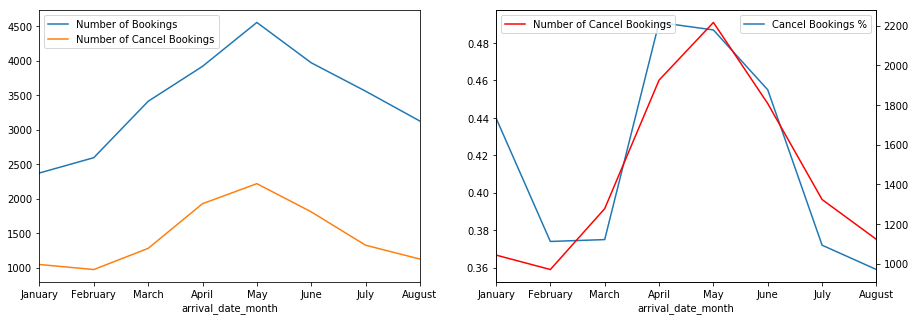

In [42]:
# Monthly distribution for all transactions 
dfMonth = pd.DataFrame(dfCity2017.groupby(['arrival_date_month']).count()['hotel'])
dfMonth.rename(columns={'hotel':'Number of Bookings'}, inplace=True)
dfMonth['Month'] = pd.Categorical(dfMonth.index, categories=months, ordered=True)
dfMonth.sort_values('Month', inplace=True)
dfMonth.reindex()

# Merge with Number of Cancel Bookings 2017 calculated earlier
dfMonth['Number of Cancel Bookings'] = dfCancelTrnx.Cancel2017
dfMonth["Cancel Bookings %"] = round(dfMonth["Number of Cancel Bookings"]/dfMonth["Number of Bookings"],3)
dfMonth.sort_values('Month', inplace=True)

# create figure and axis objects with subplots()
fig,ax = plt.subplots(1,2, figsize=(15,5))

# First Plot the graph of total books vs cancel bookings to see any similar trend
dfMonth[['Number of Bookings','Number of Cancel Bookings']].plot(kind='line', ax=ax[0])

dfMonth[['Cancel Bookings %']].plot(kind='line', ax=ax[1])
ax2=ax[1].twinx()
dfMonth[['Number of Cancel Bookings']].plot(kind='line', ax=ax2, color="red")


In [23]:
dfMonth

,Number of Bookings,Month,Number of Cancel Bookings,Cancel Bookings %
arrival_date_month,,,,
January,2372,January,1044,0.440
February,2594,February,971,0.374
March,3412,March,1278,0.375
April,3919,April,1926,0.491
May,4556,May,2217,0.487
June,3971,June,1808,0.455
July,3559,July,1324,0.372
August,3125,August,1123,0.359


# Analysis - City Hotel monthly bookings for 2017
1. Similar trend for # of total bookings vs # of cancel bookings throughout the various month.
2. Cancellation rate is relatively high, ranging from ~36%-49%.  It is higher in the month of Apr-June.

# 2.3 Feature Extractions

# 2.3.1 Feature Correlations

In [24]:
cancel_corr = dfCity2017.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

total_of_special_requests         0.271840
lead_time                         0.197206
booking_changes                   0.152772
required_car_parking_spaces       0.119477
is_repeated_guest                 0.108495
company                           0.066050
adults                            0.062481
previous_bookings_not_canceled    0.060455
stays_in_week_nights              0.055360
previous_cancellations            0.039216
babies                            0.036183
days_in_waiting_list              0.035733
agent                             0.030725
arrival_date_week_number          0.022212
children                          0.020795
adr                               0.019175
arrival_date_day_of_month         0.007737
stays_in_weekend_nights           0.002552
arrival_date_year                      NaN
Name: is_canceled, dtype: float64

# Analysis - Feature Correlations
1. It only take into consideration numerical features in the Correlation analysis above.
2. It shows that total_of_special_requests, lead_time, booking_changes, required_car_parking_spaces & is_repeated_guest are the top 5 important features, high correlated with is_canceled. 
3. However, based on previous analysis, 
    i. the cancellation rate is higher when the total bookings increased.  April to June are the highest among all.  It is not showing up in the feature correlations above due to categorical type.
    ii. Country should be another categorical feature that to consider when predicting cancellation.  However let's evaluate more in the later part of this analysis. Ex: for those bookings coming from "PRT"

# 2.3.2 Feature Extractions & Modelling

In [25]:
# Let's manually select which features to include and exclude for the model prediction
# Features to exclude:
#   1. arrival_date_year & hotel (since we only focus on City Hotel based on transactions in 2017)
#   2. reservation_status - since it is the same with is_cancelled that we want to predict
#   3. reservation_status_date - since we have the other date part features captured for those start with arrival.....

numericalFeatures = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","booking_changes","agent","company","days_in_waiting_list",
                "adr","required_car_parking_spaces","total_of_special_requests"]

categoricalFeatures = ["arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"]

# Split Features & Prediction Label
rawFeatures = numericalFeatures + categoricalFeatures
X = dfCity2017.drop(["is_canceled"], axis=1)[rawFeatures]
y = dfCity2017["is_canceled"]

# One-hot encoding for numerical data
X = pd.get_dummies(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import the classifier from sklearn
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train the Model
#model = DecisionTreeClassifier()
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# 2.3.3 Feature Importance Evaluation

Feature ranking:
feature: lead_time, importance: 0.161927793447434
feature: adr, importance: 0.09440160148933822
feature: deposit_type_No Deposit, importance: 0.08300757690820859
feature: arrival_date_day_of_month, importance: 0.08216458907743528
feature: total_of_special_requests, importance: 0.0714855728299964
feature: arrival_date_week_number, importance: 0.05770094733802425
feature: deposit_type_Non Refund, importance: 0.0551637831295069
feature: stays_in_week_nights, importance: 0.0525263280925813
feature: agent, importance: 0.04652715385313381
feature: stays_in_weekend_nights, importance: 0.03384827637987326
feature: booking_changes, importance: 0.02387459240849102
feature: market_segment_Groups, importance: 0.01962527226342341
feature: adults, importance: 0.018982179188072355
feature: customer_type_Transient, importance: 0.018795834961057772
feature: customer_type_Transient-Party, importance: 0.014963060155360535
feature: market_segment_Online TA, importance: 0.01302219165140528

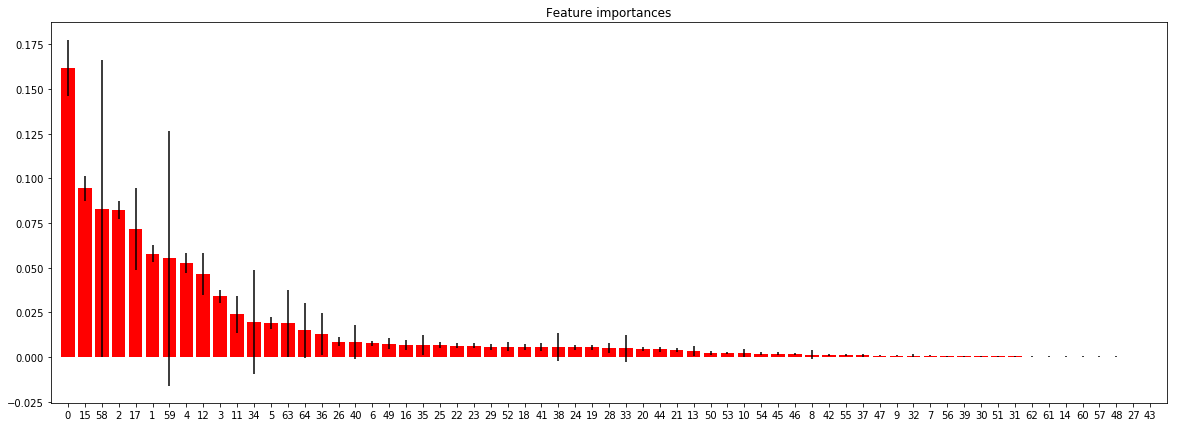

In [27]:
featureImportances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(featureImportances)[::-1]

# Print the feature ranking
print("Feature ranking:")

zipped = zip(X_train.columns, featureImportances)
zipped = sorted(zipped, key = lambda t: t[1], reverse=True)
    
for feat, importance in zipped:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), featureImportances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# 2.3.4 Model Accuracy Precision & Recall


Model Scoring:
The training accuracy is 0.992456602744706
The test accuracy is 0.8356961105052708
F1 Score:  0.8294614490507555
Precision Score:  0.8381427497658138
Recall:  0.8251900171541391

Confusion Matrix:


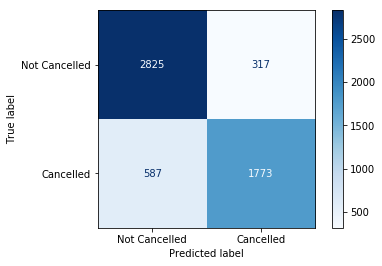

In [34]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nModel Scoring:")
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
print("F1 Score: ", f1_score(y_test, y_test_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_test_pred, average="macro"))
print("Recall: ", recall_score(y_test, y_test_pred, average="macro")) 

from sklearn.metrics import plot_confusion_matrix
print("\nConfusion Matrix:")
predictLabels = ['Not Cancelled', 'Cancelled']
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=predictLabels) 
plt.show()


# Analysis : Are we able to predict booking cancellation? (Targetted: City Hotel) 
1. Based on the City Hotel Year 2017 dataset, we used the RandomForestClassifier model to help predict whether a booking will be cancelled or not by any chance.
2. The model seems to be able to predict 82% correctly based on the historical data whether the booking will be cancel or not.
3. Below are the top 13 features with high impact on the booking cancellation possibility.
    lead_time, deposit_type, adr, arrival_date_day_of_month, arrival_date_week_number, total_of_special_requests, 
    stays_in_week_nights, agent, stays_in_weekend_nights, market_segment_Groups, booking_changes, adults, 
    customer_type
4. With the above, the hotel can use the information gained to help form a targetted plan to reduce the booking cancellation rate as well as improve the hotel business.

# Question 3. For those booking at risk for cancellation, what can the hotel do to mitigate the risk?

# 3.1 - Let's analyze how is the data distribution for Top 6 Features when the booking is cancelled.

In [108]:
# Create a subset of data for cancellation data in 2017 for City Hotel
dfCity2017Cancel = dfCity2017[(dfCity2017.is_canceled == 1)]

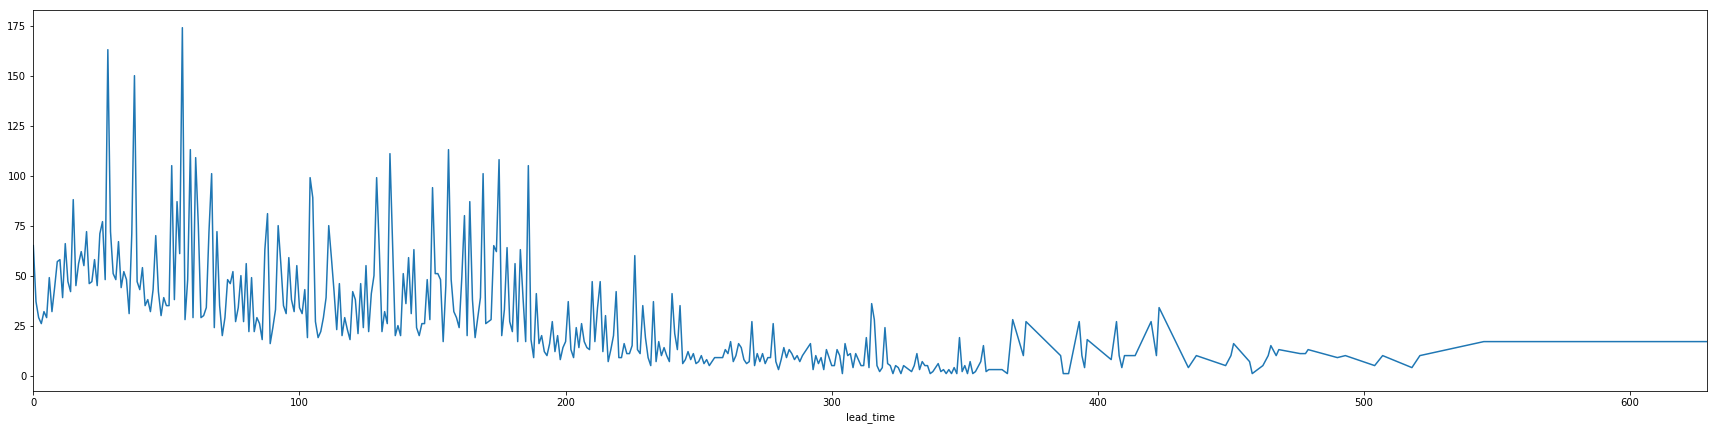

In [118]:
#Feature #1 - Lead Time - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
dfCity2017Cancel.groupby(['lead_time']).count()['hotel'].plot(kind='line', figsize=[30,7])

deposit_type
No Deposit    7866
Non Refund    3812
Refundable      13
Name: hotel, dtype: int64

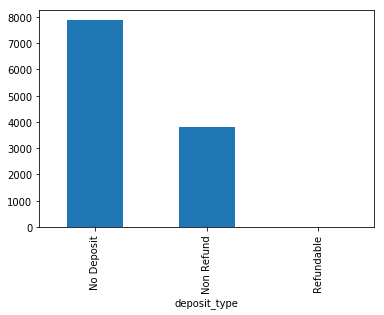

In [112]:
#Feature #2 - Deposit Type
# - No Deposit – no deposit was made; 
# - Non Refund – a deposit was made in the value of the total stay cost; 
# - Refundable – a deposit was made with a value under the total cost of stay.
dfCity2017Cancel.groupby(['deposit_type']).count()['hotel'].plot(kind='bar')
dfCity2017Cancel.groupby(['deposit_type']).count()['hotel']

In [122]:
#Feature #4 & #5 - Month & Week of arrival date.. we can analyze by Month only and skip the Week since Week is fall within the month. 

# We can refer to early same analysis done on 2.2.2

total_of_special_requests
0    8348
1    2342
2     849
3     141
4      10
5       1
Name: hotel, dtype: int64

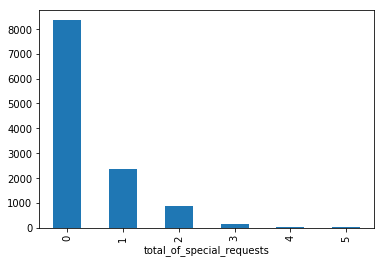

In [123]:
#Feature #6 - Total of special requests - Number of special requests made by the customer (e.g. twin bed or high floor)
dfCity2017Cancel.groupby(['total_of_special_requests']).count()['hotel'].plot(kind='bar')
dfCity2017Cancel.groupby(['total_of_special_requests']).count()['hotel']


# Analysis : For those booking at risk for cancellation, what can the hotel do to mitigate the risk?

1. Based on the subset of importance featues that selected for analysis, there is high cancellation rate when lead time < 100 days, followed by 100-200 days range and it started to reduce after 200 days.
2. For those bookings without Deposit, the cancellation rate is 2x of Non Refundale.
3. Spring time (Mar-June) in Europe are the busiest month for City Hotel.  Those months also having ~40-50% cancellation rate.
4. Majority of the cancellation requests have minimal to zero special requests.
5. Based on the above analysis, it doesn't seems to give us a good comprehensive information yet to understand more solidly & collectively what else we can do to mitigate the booking cancelation risk effectively.  Hence, it is highly recommended to deep dive further to other features and more data sets to gain more insights.
6. Being that said, below are a few recommendations to consider:
    i. During the month of Mar-July, for those bookings with lead time < 100 days, 
        - can send greeting emails to the customers to remind them on the upcoming hotel stay 
        - by offering customers with certain level of loyalty tier a higher floor stay
        - providing additional room rate discount if customers willing to switch to Deposit - Non Refundable option.

    
        
